# Sorting Algorithm Time Complexity Analysis


In [6]:
import random
import time
import matplotlib.pyplot as plt

sizes = [10, 100, 1000, 10000, 100000, 1000000]


def time_sort(sort_func, arr):
    test_arr = arr[:]
    start = time.time()
    sort_func(test_arr)
    end = time.time()
    return end - start


def avg_time_sort(sort_func, size, runs=10):
    total_time = 0
    for _ in range(runs):
        arr = [random.randint(0, 10000) for _ in range(size)]
        total_time += time_sort(sort_func, arr)
    return total_time / runs

## Bubble Sort Algorithm


In [7]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [8]:
# Test Bubble Sort performance
print("Testing Bubble Sort...")
bubble_times = []
for size in sizes:
    avg_time = avg_time_sort(bubble_sort, size)
    bubble_times.append(avg_time)
    print(f"Size {size}: {avg_time:.6f} seconds")
print()

Testing Bubble Sort...
Size 10: 0.000003 seconds
Size 100: 0.000218 seconds
Size 1000: 0.025621 seconds
Size 10000: 3.091402 seconds


KeyboardInterrupt: 

In [ ]:
# Bubble Sort Visualization
plt.figure(figsize=(10, 6))
plt.plot(sizes, bubble_times, "ro-", label="Bubble Sort", linewidth=2, markersize=6)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Bubble Sort Performance Analysis")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Bubble Sort - Time Complexity: O(n²)")
print(f"Best case at size {sizes[0]}: {bubble_times[0]:.6f} seconds")
print(f"Worst case at size {sizes[-1]}: {bubble_times[-1]:.6f} seconds")
print()

## Insertion Sort Algorithm


In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [ ]:
# Test Insertion Sort performance
print("Testing Insertion Sort...")
insertion_times = []
for size in sizes:
    avg_time = avg_time_sort(insertion_sort, size)
    insertion_times.append(avg_time)
    print(f"Size {size}: {avg_time:.6f} seconds")
print()

In [ ]:
# Insertion Sort Visualization
plt.figure(figsize=(10, 6))
plt.plot(
    sizes, insertion_times, "go-", label="Insertion Sort", linewidth=2, markersize=6
)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Insertion Sort Performance Analysis")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Insertion Sort - Time Complexity: O(n²)")
print(f"Best case at size {sizes[0]}: {insertion_times[0]:.6f} seconds")
print(f"Worst case at size {sizes[-1]}: {insertion_times[-1]:.6f} seconds")
print()

## Quick Sort Algorithm


In [ ]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    quick_sort_helper(arr, 0, len(arr) - 1)

In [ ]:
# Test Quick Sort performance
print("Testing Quick Sort...")
quick_times = []
for size in sizes:
    avg_time = avg_time_sort(quick_sort, size)
    quick_times.append(avg_time)
    print(f"Size {size}: {avg_time:.6f} seconds")
print()

In [ ]:
# Quick Sort Visualization
plt.figure(figsize=(10, 6))
plt.plot(sizes, quick_times, "bo-", label="Quick Sort", linewidth=2, markersize=6)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Quick Sort Performance Analysis")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Quick Sort - Time Complexity: O(n log n)")
print(f"Best case at size {sizes[0]}: {quick_times[0]:.6f} seconds")
print(f"Worst case at size {sizes[-1]}: {quick_times[-1]:.6f} seconds")
print()

## Algorithm Comparison


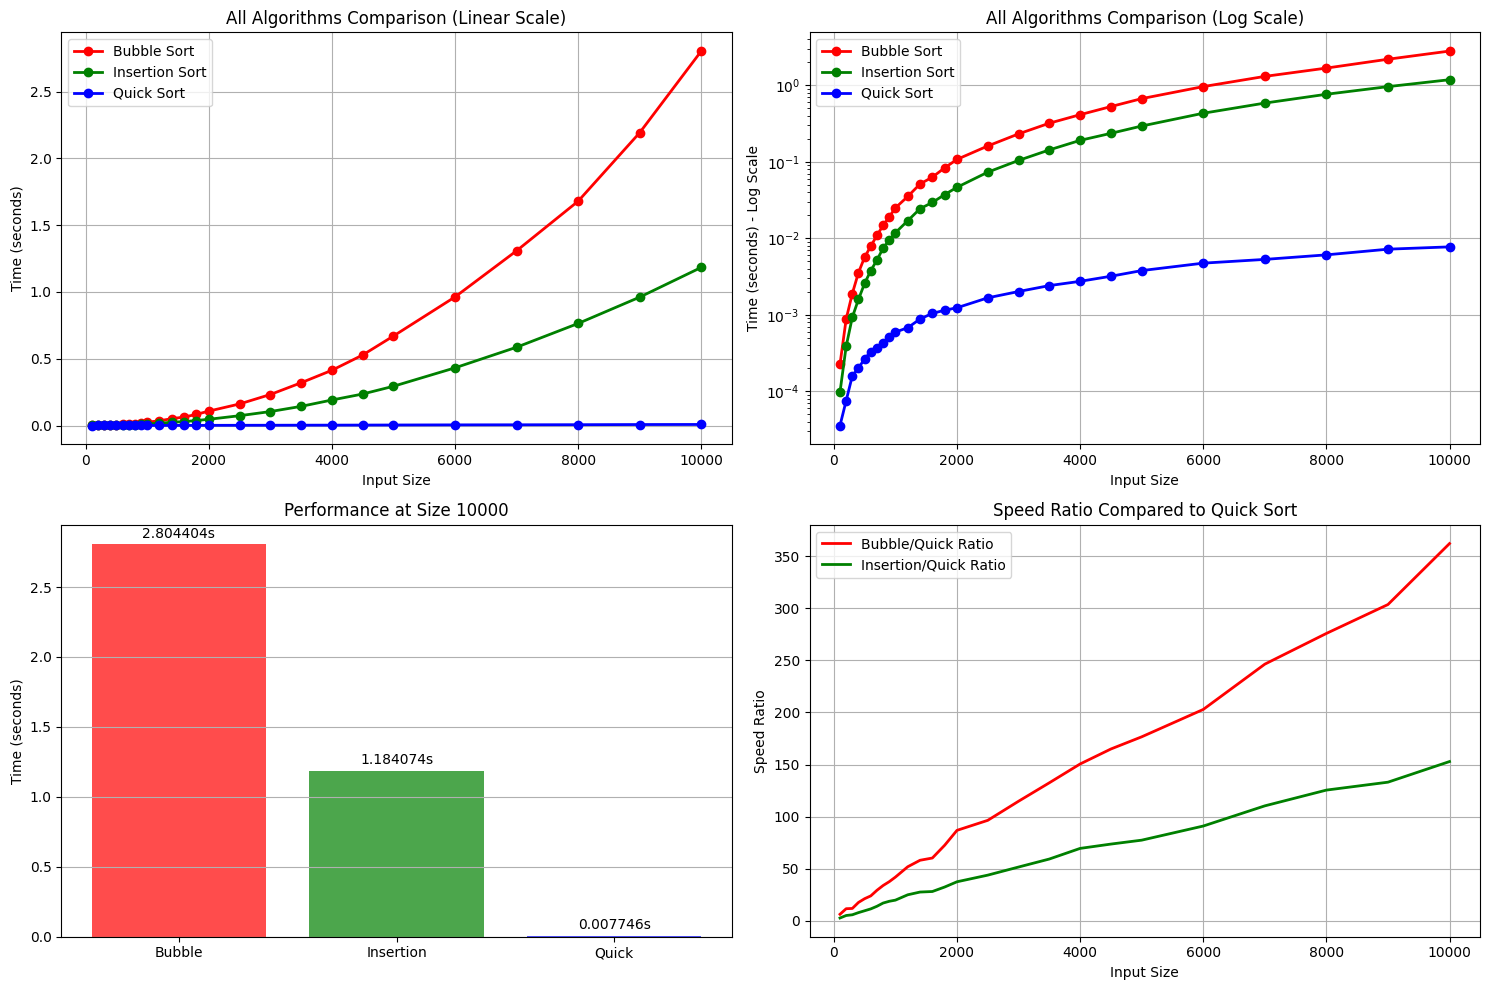


Performance Summary:
----------------------------------------------------------------------
Size   Bubble       Insertion    Quick        B/Q Ratio  I/Q Ratio 
----------------------------------------------------------------------
100    0.000227     0.000098     0.000036     6.3        2.7       
400    0.003568     0.001597     0.000202     17.7       7.9       
700    0.010922     0.005209     0.000372     29.3       14.0      
1000   0.025046     0.011857     0.000596     42.0       19.9      
1600   0.063129     0.029477     0.001047     60.3       28.2      
2500   0.161210     0.073322     0.001671     96.5       43.9      
4000   0.413455     0.190961     0.002747     150.5      69.5      
6000   0.962863     0.431845     0.004747     202.9      91.0      
9000   2.193174     0.961491     0.007226     303.5      133.1     

At largest size (10000):
Quick Sort is 362.0x faster than Bubble Sort
Quick Sort is 152.9x faster than Insertion Sort


In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(sizes, bubble_times, "ro-", label="Bubble Sort", linewidth=2)
plt.plot(sizes, insertion_times, "go-", label="Insertion Sort", linewidth=2)
plt.plot(sizes, quick_times, "bo-", label="Quick Sort", linewidth=2)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("All Algorithms Comparison (Linear Scale)")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.semilogy(sizes, bubble_times, "ro-", label="Bubble Sort", linewidth=2)
plt.semilogy(sizes, insertion_times, "go-", label="Insertion Sort", linewidth=2)
plt.semilogy(sizes, quick_times, "bo-", label="Quick Sort", linewidth=2)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds) - Log Scale")
plt.title("All Algorithms Comparison (Log Scale)")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
algorithms = ["Bubble", "Insertion", "Quick"]
times = [bubble_times[-1], insertion_times[-1], quick_times[-1]]
colors = ["red", "green", "blue"]
bars = plt.bar(algorithms, times, color=colors, alpha=0.7)
plt.ylabel("Time (seconds)")
plt.title(f"Performance at Size {sizes[-1]}")
plt.grid(True, axis="y")
for bar, time in zip(bars, times):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(times) * 0.01,
        f"{time:.6f}s",
        ha="center",
        va="bottom",
    )

plt.subplot(2, 2, 4)
plt.plot(
    sizes,
    [b / q for b, q in zip(bubble_times, quick_times)],
    "r-",
    label="Bubble/Quick Ratio",
    linewidth=2,
)
plt.plot(
    sizes,
    [i / q for i, q in zip(insertion_times, quick_times)],
    "g-",
    label="Insertion/Quick Ratio",
    linewidth=2,
)
plt.xlabel("Input Size")
plt.ylabel("Speed Ratio")
plt.title("Speed Ratio Compared to Quick Sort")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nPerformance Summary:")
print("-" * 70)
print(
    f"{'Size':<6} {'Bubble':<12} {'Insertion':<12} {'Quick':<12} {'B/Q Ratio':<10} {'I/Q Ratio':<10}"
)
print("-" * 70)
for i, size in enumerate(sizes[::3]):
    idx = i * 3
    if idx < len(sizes):
        bubble_ratio = bubble_times[idx] / quick_times[idx]
        insertion_ratio = insertion_times[idx] / quick_times[idx]
        print(
            f"{size:<6} {bubble_times[idx]:<12.6f} {insertion_times[idx]:<12.6f} {quick_times[idx]:<12.6f} {bubble_ratio:<10.1f} {insertion_ratio:<10.1f}"
        )

print(f"\nAt largest size ({sizes[-1]}):")
print(f"Quick Sort is {bubble_times[-1]/quick_times[-1]:.1f}x faster than Bubble Sort")
print(
    f"Quick Sort is {insertion_times[-1]/quick_times[-1]:.1f}x faster than Insertion Sort"
)